ANALYSIS OF MOVIES RELEASED BETWEEN 1965 - 2015:

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

INTRODUCTION

The project deals with a list of 5000 movies from TMDB database(www.themoviedb.org), which is available in the kaggle. The list has various factors such as Proftablility, Profit to the respective production company, budget of the movie, Cast and crew of the movie, genres, viewer's rating and other keywords related to the movie.

The following are the questions which I'am concentrating on :
1. The recent genres which are making profits?
3. Is there any co-relation between profit,budget and revenue?
4. What are the movies which made the highest profit?



In [5]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Library which are used:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


DATA WRANGLING:
In this Process, we are going to look for the given dataset's statitical summary and the count and the type of data's present in the each column.This things are done inorder to figure out how the data is and how we can move further with the data.

1.Read the data which is in .csv format.
2.Looking for the statisitcal summary of the data.
3.To figure out the datatype and missing values in the each column.




In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

#importing dataset from csv file

df=pd.read_csv("tmdb-movies.csv")


In [7]:
# Getting the original dataset's shape: 

print("The original dataset has (Rows,Columns): ",df.shape)
df.shape

The original dataset has (Rows,Columns):  (10866, 21)


(10866, 21)

In [8]:
# Getting the statistical summary of the data to find out the missing values in each set and to have idea of the type of 
# object we are dealing with:
df.head()





,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
#statsitical summary of the original dataset:


print("The statistical summary of the original dataset: \n\n")
df.describe()
df.head()

The statistical summary of the original dataset: 




,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
# To figure out the type of data present in the each column and to find out the missing values:

print("The datatype in each column and count of data's present in the each column: \n\n")
df.info()

The datatype in each column and count of data's present in the each column: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null

DATA CLEANING

These are the modifications that we need to impliment in the original dataset inorder to answer for our questions. This is done by remvoing the irrelevant data which are not useful for the questions.


They are:
1.The columns "id", "imdb_id", "homepage", "tagline" and "overview" are not relevant for this analysis, we can remove them.

2.The "cast", "director", "genres" and "production companies" are mutivalued fields and separated by "|". As required for the analysis, we should split the values as single entry fields.

3.The budget_adj and revenue_adj are displayed in scientific format. For this analysis, the fields are converted to int from float and we have assumed the currency in dollars.

4.As we are comparing movies from different periods, we should keep the adjusted budgets and revenues to account for the inflation over years.

5.Some columns have a significant number of missing values, for our analysis, we have replaced missing values fields with a placeholder text.

6.There are some invalid characters in cast and keywords, in our analysis of top keywords and casts, those are not creating any issues, so we have not cleaned those columns.

7.The budget, revenue, budget_adj, revenue_adj first quartiles and medians are equal to 0, we have replaced those with min value.

STEPS REQUIRED FOR THE CLEANING:

Drop not required columns for this analysis.
Delete rows with NaN values.
Delete Duplicate values.
Changing format of release date into datetime format.
Change format of budget_adj and revenue_adj to int from float.


In [11]:
# After discussing the structure of the data and any problems that need to be

df.drop(columns=["id","imdb_id","homepage","tagline","overview"], index=[0],inplace=True, errors="ignore")
print("We removed the columns which are not required for the analysis - 'id',imdb_id','homepage','tagline','overview': \n\n")
df.head()



We removed the columns which are not required for the analysis - 'id',imdb_id','homepage','tagline','overview': 




,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08


In [12]:
#TO FIND THE COLUMNS WITH 0 VALUES

print("count columns with 0 values: \n\n")
df.isin([0]).sum()

count columns with 0 values: 




popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
director                   0
keywords                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

DATA CLEANING CONTINUED,

In [13]:
# NEED TO COLUMNS WITH MISSING VALUES AND THEN NEED TO REPLACE IT:
#CHECK NA VALUES:
print("Checking for NA values:\n\n")
df.isna().sum()

Checking for NA values:




popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
#FILL 0 WITH NAN
df['budget']= df['budget'].replace(0,np.NAN)
df['budget_adj']=df['budget_adj'].replace(0,np.NAN)
df['revenue']=df['revenue'].replace(0,np.NAN)
df['revenue_adj']=df['revenue_adj'].replace(0,np.NAN)

# FILL 0 VALUES WITH MINIMUM VALUES

df.fillna(df.mean(),inplace=True)
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [15]:
# FINDING DUPLICATES IN THE DATASET
print("duplicates are indicated by true:\n")
(df.duplicated()).value_counts()

duplicates are indicated by true:



False    10864
True         1
dtype: int64

In [16]:
# DUPLICATES NEEDED TO REMOVED WITH NAN VALUES:

df.dropna(inplace=True)
df.shape
print("Data after removing Duplicates(rows,columns) : ",df.shape)


Data after removing Duplicates(rows,columns) :  (8666, 16)


In [17]:
# CHECKING FOR NA VALUES AFTER CLEANING:

print("After the cleaning of data,count of NaN Values:\n\n")
df.isna().sum()

After the cleaning of data,count of NaN Values:




popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [25]:
# Changing the format of dates:
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'ignore')

In [26]:
print("Year range - ", df.release_year.min(),df.release_year.max())

Year range -  1960 2015


In [28]:
values = {'keywords': 'Keywords Missing', 'production_companies': 'production_companies Missing', 'cast': 'cast missing'}
df.fillna(value=values, inplace = True)

In [29]:
#check NaN values again
print("Now after cleaning, count of NaN values in columns:\n\n ")
df.isna().sum()

Now after cleaning, count of NaN values in columns:

 


popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
profit                  0
profit_adj              0
dtype: int64

In [32]:
#COVERTING DATATYP OF BUDGET,REVENUE FROM FLOAT TO INT:

def float_to_int(number):
    return np.int(number)

#APPLYING THE ABOVE FUNCTION, WE GET
df['budget_adj']=df['budget_adj'].apply(float_to_int)
df['revenue_adj']=df['revenue_adj'].apply(float_to_int)

#CREATING PROFIT AND ADJUSTED PROFITS:
df['profit']=df['revenue']-df['budget']
df['profit_adj']=df['revenue_adj']-df['budget_adj']

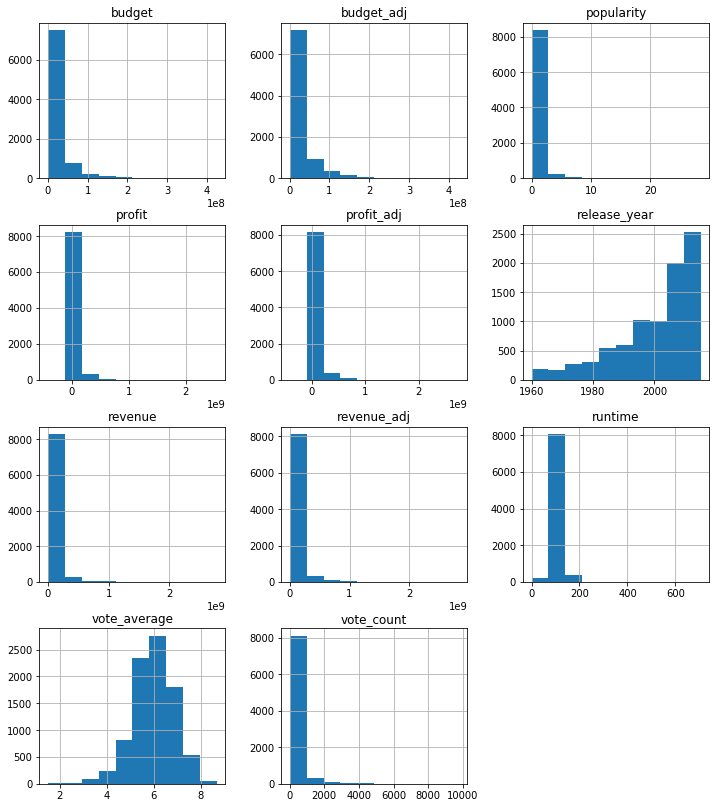

In [50]:
df.hist(figsize=(12,14));

Object `profits` not found.


Text(0.5,1,'highest revenue movies')

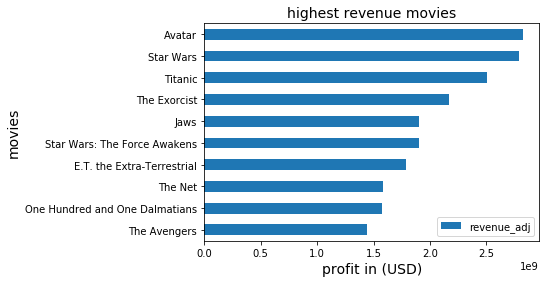

In [20]:
QUESTION NUMBER-1 #What are the Movies with higher revenues,higher budget and higer profits?

#create new dataset for movie revenue calculation
df_movie_revenue = pd.melt(df, id_vars = ['original_title'], value_vars = ['revenue_adj'], value_name = 'revenue_adj')

df_movie_revenue.sort_values(['revenue_adj'], ascending = False).head(10).plot(kind = 'barh', x = 'original_title');

plt.gca().invert_yaxis()
# Graph features
plt.xlabel('profit in (USD)', fontsize = 14)
plt.ylabel('movies', fontsize = 14)
plt.title('highest revenue movies', fontsize = 14)


Text(0.5,0,'Budget in (USD)')

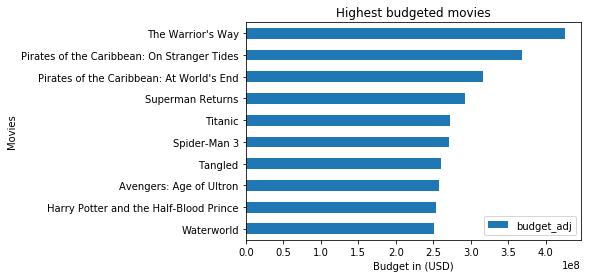

In [35]:
#The movies with higher budgets:
df_movie_budget = pd.melt(df, id_vars = ['original_title'], value_vars = ['budget_adj'], value_name = 'budget_adj')

df_movie_budget.sort_values(['budget_adj'], ascending = False).head(10).plot(kind = 'barh', x = 'original_title');

plt.gca().invert_yaxis()
plt.title("Highest budgeted movies")
plt.ylabel("Movies")
plt.xlabel("Budget in (USD)")

Text(0.5,1,'highest profited movies')

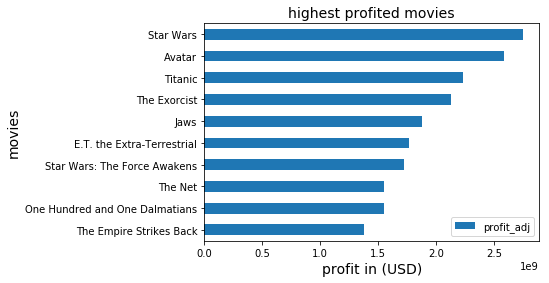

In [22]:
#The movies with higher profits:

df_movie_profit = pd.melt(df, id_vars = ['original_title'], value_vars = ['profit_adj'], value_name = 'profit_adj')

df_movie_profit.sort_values(['profit_adj'], ascending = False).head(10).plot(kind = 'barh', x = 'original_title');
plt.gca().invert_yaxis()
# Graph features
plt.xlabel('profit in (USD)', fontsize = 14)
plt.ylabel('movies', fontsize = 14)
plt.title('highest profited movies', fontsize = 14)

Text(0.5,1,'highest revenue movies')

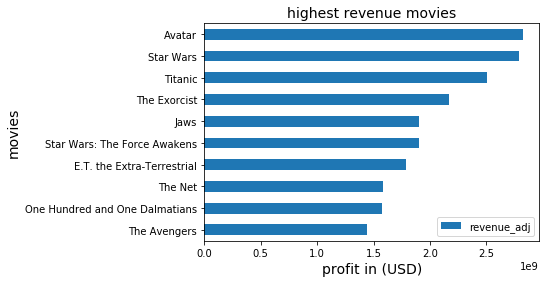

In [39]:
#Movies with higher revenues:
df_movie_revenue = pd.melt(df, id_vars = ['original_title'], value_vars = ['revenue_adj'], value_name = 'revenue_adj')

df_movie_revenue.sort_values(['revenue_adj'], ascending = False).head(10).plot(kind = 'barh', x = 'original_title');

plt.gca().invert_yaxis()
# Graph features
plt.xlabel('profit in (USD)', fontsize = 14)
plt.ylabel('movies', fontsize = 14)
plt.title('highest revenue movies', fontsize = 14)

In [43]:
#QWuestion-2: Is there any co-relation between profit,budgetand revenue?
#Create a dataset for movies made $100M or more profit

df_profited = df[df['profit_adj'] >= 100000000]

#Create a subset of above dataset to limit that to recent years
df_recent_years = df_profited[df_profited['release_year'] >= 2009]

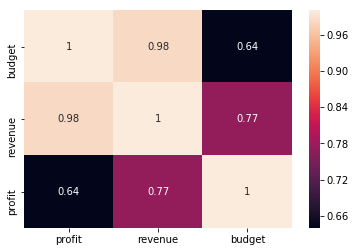

In [49]:
df_invest = pd.DataFrame(df_recent_years,columns=['profit_adj','revenue_adj','budget_adj'])

cor = df_invest.corr()

x_axis_labels = ['profit','revenue','budget'] # labels for x-axis
y_axis_labels = ['budget','revenue','profit'] # labels for y-axis
sns.heatmap(cor, annot=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()


<a id='conclusions'></a>
## Conclusions

These are the findings after the analysis of the given data.

1.The most profitable movie is Star wars followed by Avatar and Titanic. Those movies also generated the highest revenue. However, only Titanic is listed as one of the top highest budget movies. Most budget movies are not necessarily profitable movies and most profitable movies are not necessarily high budgeted movies.

2.Avatar has scored the highest revenue in recent years from 2009 - 2015.

3.There is a correlation between budget, revenue, and profit during recent years. If the movie is made with a higher budget, which means having a successful team of directors, casts, and technology, there are higher chances that movies will generate high revenue and profit.

4.The sci-fi and super-hero movies are making higher profits and revenue in the recent years.

Reference websites used in addition to course material and peer help:
https://pandas.pydata.org
https://stackoverflow.com
https://github.com


In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0